In [2]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from random import random
import array
import math as m
from __future__ import division

In [3]:
def modulo(x):
    modulo = 2**32
    multiplicador = 1013904223
    incremento = 1664525
    return (x*multiplicador + incremento) % modulo

In [4]:
numeros = []
numeros

[]

In [5]:
x = 96102
for i in range(100000):
    numeros.insert(i, modulo(x)/(2**32))
    x = modulo(x)

In [6]:
bins_list = np.unique(numeros)

(array([100000.]), array([0, 1]), <a list of 1 Patch objects>)

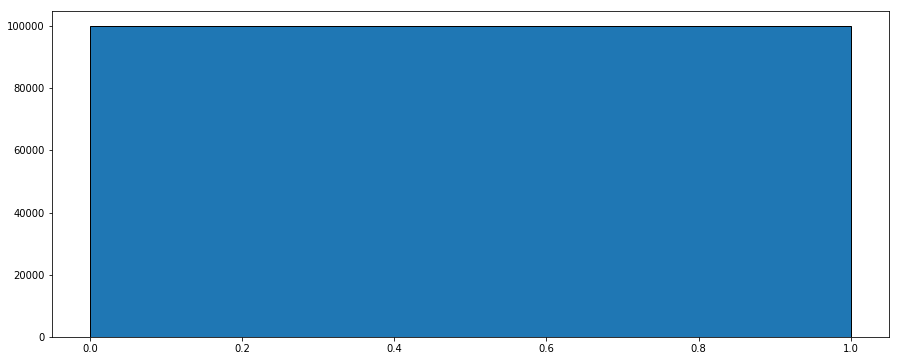

In [9]:
plt.figure(figsize=(15,6))
plt.hist(numeros, bins = 100000, ec = 'black')

In [6]:
def estaEnElIntervalo(x):
    return ((x < 0.5 and x > 0.2) or x == 0.5 or x == 0.2)

In [7]:
def longitudGap(arreglo, i):
    longitudGap = 0
    if (i < len(arreglo)):
        if (estaEnElIntervalo(arreglo[i]) == True and i < len(arreglo)):
            i = i + 1
            while (estaEnElIntervalo(arreglo[i]) == False and i < len(arreglo)):
                longitudGap = longitudGap + 1
                if  (i < len(arreglo)):
                    i = i + 1
    return longitudGap

In [8]:
longitudes = []
longitudes

[]

In [10]:
for i in range(len(numeros)):
    if(estaEnElIntervalo(numeros[i])):
        lenght = longitudGap(numeros, i)
        longitudes.insert(len(longitudes), lenght)

IndexError: list index out of range

In [12]:
(unique, counts) = np.unique(longitudes, return_counts=True)
frequencies = np.asarray((unique, counts)).T

In [16]:
p = 0.5 - 0.2
p

0.3

In [44]:
def probabilidadGap(x, p):
    return p*((1 - p)**x)

In [45]:
probabilidades = []

In [46]:
for i in np.unique(longitudes):
    probabilidades.insert(len(probabilidades),probabilidadGap(i, 0.3))

In [52]:
list_bin = np.unique(longitudes)

(array([8.929e+03, 6.443e+03, 4.456e+03, 3.082e+03, 2.149e+03, 1.444e+03,
        1.028e+03, 7.830e+02, 5.250e+02, 3.740e+02, 2.500e+02, 1.730e+02,
        9.700e+01, 8.300e+01, 6.400e+01, 4.400e+01, 3.500e+01, 1.700e+01,
        2.500e+01, 1.200e+01, 8.000e+00, 6.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 37]),
 <a list of 29 Patch objects>)

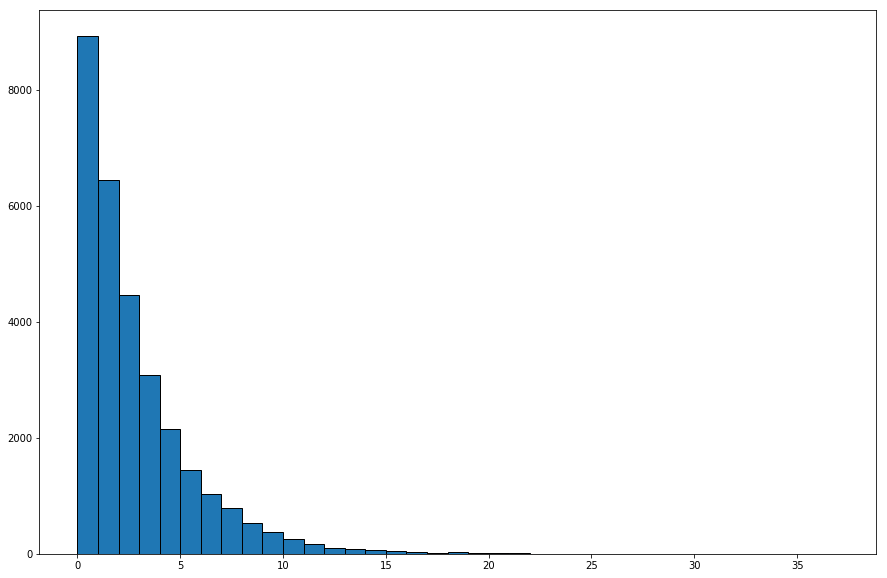

In [49]:
plt.figure(figsize=(15,10))
plt.hist(longitudes, bins = list_bin, ec = 'black')

In [25]:
import scipy.stats as st

In [38]:
frecuencias_observadas = np.unique(longitudes, return_counts=True)
frecuencias_observadas = frecuencias_observadas[1]

array([8929, 6443, 4456, 3082, 2149, 1444, 1028,  783,  525,  374,  250,
        173,   97,   83,   64,   44,   35,   17,   25,   12,    8,    6,
          2,    3,    2,    1,    1,    1,    1,    1])

In [65]:
frecuencias_esperadas = np.array(probabilidades)*100000
frecuencias_esperadas

array([3.00000000e+04, 2.10000000e+04, 1.47000000e+04, 1.02900000e+04,
       7.20300000e+03, 5.04210000e+03, 3.52947000e+03, 2.47062900e+03,
       1.72944030e+03, 1.21060821e+03, 8.47425747e+02, 5.93198023e+02,
       4.15238616e+02, 2.90667031e+02, 2.03466922e+02, 1.42426845e+02,
       9.96987917e+01, 6.97891542e+01, 4.88524079e+01, 3.41966856e+01,
       2.39376799e+01, 1.67563759e+01, 1.17294631e+01, 8.21062420e+00,
       5.74743694e+00, 4.02320586e+00, 2.81624410e+00, 1.97137087e+00,
       6.76180209e-01, 5.56863478e-02])

In [66]:
frecuencias_esperadas = np.array(p_ob)*100000
frecuencias_esperadas

array([1.11994624e+01, 1.55207202e+01, 2.24416517e+01, 3.24464633e+01,
       4.65332713e+01, 6.92520776e+01, 9.72762646e+01, 1.27713921e+02,
       1.90476190e+02, 2.67379679e+02, 4.00000000e+02, 5.78034682e+02,
       1.03092784e+03, 1.20481928e+03, 1.56250000e+03, 2.27272727e+03,
       2.85714286e+03, 5.88235294e+03, 4.00000000e+03, 8.33333333e+03,
       1.25000000e+04, 1.66666667e+04, 5.00000000e+04, 3.33333333e+04,
       5.00000000e+04, 1.00000000e+05, 1.00000000e+05, 1.00000000e+05,
       1.00000000e+05, 1.00000000e+05])

In [67]:
N = sum(frecuencias_observadas)
p_ob = 1/frecuencias_observadas
p_ob

array([1.11994624e-04, 1.55207202e-04, 2.24416517e-04, 3.24464633e-04,
       4.65332713e-04, 6.92520776e-04, 9.72762646e-04, 1.27713921e-03,
       1.90476190e-03, 2.67379679e-03, 4.00000000e-03, 5.78034682e-03,
       1.03092784e-02, 1.20481928e-02, 1.56250000e-02, 2.27272727e-02,
       2.85714286e-02, 5.88235294e-02, 4.00000000e-02, 8.33333333e-02,
       1.25000000e-01, 1.66666667e-01, 5.00000000e-01, 3.33333333e-01,
       5.00000000e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [68]:
(D2, p_valor) = st.chisquare(frecuencias_observadas, frecuencias_esperadas)

In [69]:
D2

11749632.855130132

In [70]:
p_valor

0.0

In [33]:
alpha = 0.01

In [34]:
if (p_valor < alpha):
    print "Se rechaza H0"
else:
    print "No se puede rechazar H0"

Se rechaza H0
